# 3 Training and Modelling the Data<a id='4_Training_and_Modeling_the_Data'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Training and Modelling the Data](#3_Training_and_Modelling_the_Data)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Imports](#3.2_Imports)
  * [3.3 Load Data](#3.3_Load_Data)
  * [3.4 Train/Test Split](#3.4_Train_Test_Split)
  * [3.5 Modelling](#3.5_Modelling)
    * [3.5.1 Model 1](#3.5.1_----)
        * [3.5.1.1 Train the model on the train split](#3.5.1.1_Train_the_model_on_the_train_split)
        * [3.5.1.2 Make predictions using the model on both train and test splits](#3.5.1.2_Make_predictions_using_the_model_on_both_train_and_test_splits)
        * [3.5.1.3 Assess model performance](#3.5.1.3_Assess_model_performance)
    * [3.5.2 -----](#3.5.2_Decision_Tree_without_entropy)
        * [3.5.2.1 Train the model on the train split](#3.5.2.1_Train_the_model_on_the_train_split)
        * [3.5.2.2 Make predictions using the model on both train and test splits](#3.5.2.2_Make_predictions_using_the_model_on_both_train_and_test_splits)
        * [3.5.2.3 Assess model performance](#3.5.1.3_Assess_model_performance)
  * [3.6 Final Model Selection](#3.6_Final_Model_Selection)
    * [3.6.1 --- model performance](#3.6.1_Logistic_regression_model_performance)
    * [3.6.2 --- model performance](#3.6.2_Decision_Tree_model_performance)
    * [3.6.3 Conclusion](#3.6.3_Conclusion)

## 3.2 Imports<a id='3.2_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
import datetime
from sklearn import metrics
from sklearn.tree import export_text
import matplotlib.image as pltimg
from IPython.display import Image  
import pydotplus

## 3.3 Load Data<a id='3.3_Load_Data'></a>

In [2]:
spotify_data = pd.read_csv('../data/top_200_tracks_features.csv')
spotify_data.head()

,Unnamed: 0,Position,Track Name,Artist,Stream Count/Week,URL,source,Week Ending,id,name,...,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,1,Blinding Lights,The Weeknd,41066317,https://open.spotify.com/track/0sf12qNH5qcw8qp...,regional-global-weekly-2020-03-06--2020-03-13.csv,2020-03-13,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,...,30,0.513,0.00147,0.796,0.000209,0.0938,-4.075,0.0629,171.017,4
1,1,2,The Box,Roddy Ricch,37470185,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,regional-global-weekly-2020-03-06--2020-03-13.csv,2020-03-13,0nbXyq5TXYPCO7pr3N8S4I,The Box,...,88,0.896,0.10400,0.586,0.000000,0.7900,-6.687,0.0559,116.971,4
2,2,3,Dance Monkey,Tones And I,36071262,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,regional-global-weekly-2020-03-06--2020-03-13.csv,2020-03-13,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,...,69,0.825,0.68800,0.593,0.000161,0.1700,-6.401,0.0988,98.078,4
3,3,4,Don't Start Now,Dua Lipa,32169572,https://open.spotify.com/track/6WrI0LAC5M1Rw2M...,regional-global-weekly-2020-03-06--2020-03-13.csv,2020-03-13,6WrI0LAC5M1Rw2MnX2ZvEg,Don't Start Now,...,85,0.794,0.01250,0.793,0.000000,0.0952,-4.521,0.0842,123.941,4
4,4,5,La Difícil,Bad Bunny,29598307,https://open.spotify.com/track/6NfrH0ANGmgBXyx...,regional-global-weekly-2020-03-06--2020-03-13.csv,2020-03-13,6NfrH0ANGmgBXyxgV2PeXt,La Difícil,...,81,0.685,0.08610,0.848,0.000007,0.0783,-4.561,0.0858,179.870,4


In [3]:
spotify_data.shape

(10600, 24)

In [4]:
print(list(spotify_data.columns))

['Unnamed: 0', 'Position', 'Track Name', 'Artist', 'Stream Count/Week', 'URL', 'source', 'Week Ending', 'id', 'name', 'album', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature']


In [5]:
spotify_data = spotify_data.drop(['Unnamed: 0','Track Name', 'Artist','URL', 'source','id','name', 'album', 'artist'],axis = 1)
spotify_data.head()

,Position,Stream Count/Week,Week Ending,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,1,41066317,2020-03-13,2019-11-29,201573,30,0.513,0.00147,0.796,0.000209,0.0938,-4.075,0.0629,171.017,4
1,2,37470185,2020-03-13,2019-12-06,196652,88,0.896,0.10400,0.586,0.000000,0.7900,-6.687,0.0559,116.971,4
2,3,36071262,2020-03-13,2019-05-10,209754,69,0.825,0.68800,0.593,0.000161,0.1700,-6.401,0.0988,98.078,4
3,4,32169572,2020-03-13,2019-10-31,183290,85,0.794,0.01250,0.793,0.000000,0.0952,-4.521,0.0842,123.941,4
4,5,29598307,2020-03-13,2020-02-28,163084,81,0.685,0.08610,0.848,0.000007,0.0783,-4.561,0.0858,179.870,4


In [6]:
spotify_data.shape

(10600, 15)

In [7]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Position           10600 non-null  int64  
 1   Stream Count/Week  10600 non-null  int64  
 2   Week Ending        10600 non-null  object 
 3   release_date       10600 non-null  object 
 4   length             10600 non-null  int64  
 5   popularity         10600 non-null  int64  
 6   danceability       10600 non-null  float64
 7   acousticness       10600 non-null  float64
 8   energy             10600 non-null  float64
 9   instrumentalness   10600 non-null  float64
 10  liveness           10600 non-null  float64
 11  loudness           10600 non-null  float64
 12  speechiness        10600 non-null  float64
 13  tempo              10600 non-null  float64
 14  time_signature     10600 non-null  int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 1.2+ MB


In [8]:
spotify_data["release_date"] = pd.to_datetime(spotify_data["release_date"])
spotify_data["Week Ending"]  = pd.to_datetime(spotify_data["Week Ending"])

In [9]:
spotify_data["days elapsed"] = (spotify_data["release_date"] - spotify_data["Week Ending"]).dt.days

In [10]:
spotify_data = spotify_data.set_index('Week Ending')
spotify_data.index

DatetimeIndex(['2020-03-13', '2020-03-13', '2020-03-13', '2020-03-13',
               '2020-03-13', '2020-03-13', '2020-03-13', '2020-03-13',
               '2020-03-13', '2020-03-13',
               ...
               '2021-03-19', '2021-03-19', '2021-03-19', '2021-03-19',
               '2021-03-19', '2021-03-19', '2021-03-19', '2021-03-19',
               '2021-03-19', '2021-03-19'],
              dtype='datetime64[ns]', name='Week Ending', length=10600, freq=None)

In [11]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10600 entries, 2020-03-13 to 2021-03-19
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Position           10600 non-null  int64         
 1   Stream Count/Week  10600 non-null  int64         
 2   release_date       10600 non-null  datetime64[ns]
 3   length             10600 non-null  int64         
 4   popularity         10600 non-null  int64         
 5   danceability       10600 non-null  float64       
 6   acousticness       10600 non-null  float64       
 7   energy             10600 non-null  float64       
 8   instrumentalness   10600 non-null  float64       
 9   liveness           10600 non-null  float64       
 10  loudness           10600 non-null  float64       
 11  speechiness        10600 non-null  float64       
 12  tempo              10600 non-null  float64       
 13  time_signature     10600 non-null  int64    

In [12]:
feature_names = list(spotify_data.columns[3:])
print("features:", feature_names, sep="\n")

features:
['length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'days elapsed']


## 3.4 Train/Test Split<a id='3.4_Train_Test_Split'></a>

In [13]:
len(spotify_data) * .7, len(spotify_data) * .3

(7419.999999999999, 3180.0)

In [14]:
X = spotify_data[feature_names]

y = spotify_data['Stream Count/Week']

In [15]:
X1 = spotify_data.loc[spotify_data.Position==1,feature_names]
y1 = spotify_data.loc[spotify_data.Position==1,'Stream Count/Week']

In [16]:
y1.shape

(53,)

In [17]:
y1.head()

Week Ending
2020-03-13    41066317
2020-03-20    38959007
2020-03-27    52375259
2020-04-03    46779503
2020-04-10    45847200
Name: Stream Count/Week, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [19]:
X_train.shape, X_test.shape

((7420, 12), (3180, 12))

In [20]:
y_train.shape, y_test.shape

((7420,), (3180,))

## 3.6 Models<a id='3.6_Models'></a>

### 3.6.1 Linear Regression<a id='3.6.1_Linear_Regression'></a>

#### 3.6.1.1 Train the model on the train split<a id='3.6.1.1_Train_the_model_on_the_train_split'></a>

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.score(X, y)
reg.coef_

array([-8.25449183e+00,  6.86426635e+04,  1.80431763e+06, -1.52692365e+05,
        3.05234708e+06, -4.70391080e+06,  1.48524317e+06, -2.78762713e+05,
       -3.33316455e+06,  1.35673206e+04, -1.08763731e+05,  3.61417459e+01])

In [22]:
reg = reg.fit(X_train, y_train)

#### 3.6.1.2 Make predictions using the model on both train and test splits<a id='3.6.1.2_Make_predictions_using_the_model_on_both_train_and_test_splits'></a>

In [23]:
reg_train_pred = reg.predict(X_train)

reg_test_pred = reg.predict(X_test)

In [24]:
reg_train_pred = pd.Series(reg_train_pred)

reg

LinearRegression()

#### 3.6.1.3 Assess model performance<a id='3.6.1.3_Assess_model_performance'></a>

##### Training Set

In [25]:
# Regression metrics
explained_variance=metrics.explained_variance_score(y_train, reg_train_pred)
mean_absolute_error=metrics.mean_absolute_error(y_train, reg_train_pred) 
mse=metrics.mean_squared_error(y_train, reg_train_pred) 
mean_squared_log_error=metrics.mean_squared_log_error(y_train, reg_train_pred)
median_absolute_error=metrics.median_absolute_error(y_train, reg_train_pred)
r2=metrics.r2_score(y_train, reg_train_pred)

print('explained_variance: ', round(explained_variance,4))    
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.0361
mean_squared_log_error:  0.2353
r2:  0.0361
MAE:  3823156.6654
MSE:  32053182916372.875
RMSE:  5661553.0481


##### Test Set

In [26]:
# Regression metrics
explained_variance=metrics.explained_variance_score(y_test, reg_test_pred)
mean_absolute_error=metrics.mean_absolute_error(y_test, reg_test_pred) 
mse=metrics.mean_squared_error(y_test, reg_test_pred) 
mean_squared_log_error=metrics.mean_squared_log_error(y_test, reg_test_pred)
median_absolute_error=metrics.median_absolute_error(y_test, reg_test_pred)
r2=metrics.r2_score(y_test, reg_test_pred)

print('explained_variance: ', round(explained_variance,4))    
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.0436
mean_squared_log_error:  0.2331
r2:  0.0426
MAE:  3839079.8179
MSE:  31413852182776.152
RMSE:  5604806.1682


#### 3.6.1.4 Train the model on the new train split<a id='3.6.1.1_Train_the_model_on_the_train_split'></a>

In [27]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=47)

In [28]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression().fit(X1, y1)
reg.score(X1, y1)
reg.coef_

array([-6.46047083e+00,  6.41221954e+04,  2.23449372e+06, -3.58826506e+04,
        2.63310216e+06, -4.71003868e+06,  1.56198161e+06, -2.79026745e+05,
       -3.05645531e+06,  1.46104689e+04, -6.89213046e+03,  7.00378981e+01])

In [29]:
reg1 = reg1.fit(X1_train, y1_train)

#### 3.6.1.5 Make predictions using the model on both train and test splits<a id='3.6.1.5_Make_predictions_using_the_model_on_both_train_and_test_splits'></a>

In [30]:
reg1_train_pred = reg1.predict(X1_train)

reg1_test_pred = reg1.predict(X1_test)

reg1_train_pred = pd.Series(reg1_train_pred)

reg1

LinearRegression()

#### 3.6.1.6 Assess model performance<a id='3.6.1.6_Assess_model_performance'></a>

##### Training Set

In [31]:
# Regression metrics
explained_variance=metrics.explained_variance_score(y1_train, reg1_train_pred)
mean_absolute_error=metrics.mean_absolute_error(y1_train, reg1_train_pred) 
mse=metrics.mean_squared_error(y1_train, reg1_train_pred) 
mean_squared_log_error=metrics.mean_squared_log_error(y1_train, reg1_train_pred)
median_absolute_error=metrics.median_absolute_error(y1_train, reg1_train_pred)
r2=metrics.r2_score(y1_train, reg1_train_pred)

print('explained_variance: ', round(explained_variance,4))    
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.2736
mean_squared_log_error:  0.0212
r2:  0.2736
MAE:  4112991.1358
MSE:  54385096712330.62
RMSE:  7374625.1913


##### Test Set

In [32]:
# Regression metrics
explained_variance=metrics.explained_variance_score(y1_test, reg1_test_pred)
mean_absolute_error=metrics.mean_absolute_error(y1_test, reg1_test_pred) 
mse=metrics.mean_squared_error(y1_test, reg1_test_pred) 
mean_squared_log_error=metrics.mean_squared_log_error(y1_test, reg1_test_pred)
median_absolute_error=metrics.median_absolute_error(y1_test, reg1_test_pred)
r2=metrics.r2_score(y1_test, reg1_test_pred)

print('explained_variance: ', round(explained_variance,4))    
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  -0.197
mean_squared_log_error:  0.044
r2:  -0.3199
MAE:  6429035.2194
MSE:  84886230174460.88
RMSE:  9213372.3562


### 3.6.2 ARIMA Model <a id='3.6.2_ARIMA_Model'></a>

#### 3.6.2.1 Train the model on the train split<a id='3.6.2.1_Train_the_model_on_the_train_split'></a>

<AxesSubplot:xlabel='Week Ending'>

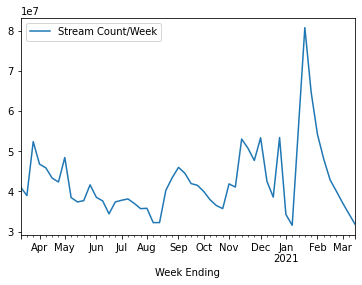

In [33]:
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from random import random

y1 = DataFrame (spotify_data.loc[spotify_data.Position==1,'Stream Count/Week'])

y1.index = pd.DatetimeIndex(y1.index).to_period('W')
y1['Stream Count/Week'] = y1['Stream Count/Week'].astype(int)

y1.plot()

In [34]:
def find_mse(data, arima_order):
    # Needs to be an integer because it is later used as an index.
    split = int(len(data) * 0.8)
    # Make train and test variables, with 'train, test'
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train]
    # make predictions. Declare a variable with that name
    predictions = list()
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model.
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit(disp=0)
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    # Return the error
    return error

In [35]:
# Make a function to evaluate different ARIMA models with several different p, d, and q values.
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    # Iterate through p_values
    for p in p_values:
        # Iterate through d_values
        for d in d_values:
            # Iterate through q_values
            for q in q_values:
                # p, d, q iterator variables in that order
                order = (p,d,q)
                try:
                    # Make a variable called mse for the Mean squared error
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [36]:
# Now, we choose a couple of values to try for each parameter.
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [37]:
# Finally, we can find the optimum ARIMA model for our data.
# Nb. this can take a while...!
import warnings
warnings.filterwarnings("ignore")
evaluate_models(y1, p_values, d_values, q_values)

Best ARIMANone MSE=inf


#### 3.6.2.2 Make predictions using the model on both train and test splits<a id='3.6.1.2_Make_predictions_using_the_model_on_both_train_and_test_splits'></a>

In [38]:
p=1
d=1
q=1
model = ARIMA(y1, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(24)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Stream Count/Week   No. Observations:                   53
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -903.606
Date:                Wed, 07 Apr 2021   AIC                           1813.211
Time:                        08:45:51   BIC                           1819.065
Sample:                    03-15-2020   HQIC                          1815.456
                         - 03-21-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5472      0.137      3.985      0.000       0.278       0.816
ma.L1         -0.9416      0.105     -8.945      0.000      -1.148      -0.735
sigma2      8.007e+13   2.13e-15   3.75e+28      0.000    8.01e+13    8.01e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):               438.16
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               4.50   Skew:                             2.91
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.04e+43. Standard errors may be unstable.
"""

In [39]:
p=1
d=2
q=1
model = ARIMA(y1, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(24)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Stream Count/Week   No. Observations:                   53
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -895.764
Date:                Wed, 07 Apr 2021   AIC                           1797.529
Time:                        08:45:51   BIC                           1803.324
Sample:                    03-15-2020   HQIC                          1799.743
                         - 03-21-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0829      0.167     -0.496      0.620      -0.410       0.245
ma.L1         -0.9538      0.101     -9.429      0.000      -1.152      -0.756
sigma2       1.37e+14   5.88e-16   2.33e+29      0.000    1.37e+14    1.37e+14
===================================================================================
Ljung-Box (L1) (Q):                   0.71   Jarque-Bera (JB):               523.19
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               3.93   Skew:                             2.97
Prob(H) (two-sided):                  0.01   Kurtosis:                        17.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.15e+45. Standard errors may be unstable.
"""

In [40]:
p=1
d=3
q=1
model = ARIMA(y1, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(24)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Stream Count/Week   No. Observations:                   53
Model:                 ARIMA(1, 3, 1)   Log Likelihood                -893.982
Date:                Wed, 07 Apr 2021   AIC                           1793.963
Time:                        08:45:51   BIC                           1799.699
Sample:                    03-15-2020   HQIC                          1796.148
                         - 03-21-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4750      0.105     -4.533      0.000      -0.680      -0.270
ma.L1         -0.9743      0.157     -6.202      0.000      -1.282      -0.666
sigma2      2.915e+14   2.28e-16   1.28e+30      0.000    2.92e+14    2.92e+14
===================================================================================
Ljung-Box (L1) (Q):                   4.32   Jarque-Bera (JB):               186.54
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):              13.78   Skew:                             1.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.32e+46. Standard errors may be unstable.
"""

#### 3.6.1.3 Assess model performance<a id='3.6.1.3_Assess_model_performance'></a>

In [41]:
# Make a function to evaluate different ARIMA models with several different p, d, and q values.
def evaluate_models(y1, p_values, d_values, q_values):
    best_score, best_y1 = float("inf"), None
    # Iterate through p_values
    for p in p_values:
        # Iterate through d_values
        for d in d_values:
            # Iterate through q_values
            for q in q_values:
                # p, d, q iterator variables in that order
                order = (p,d,q)
                try:
                    # Make a variable called mse for the Mean squared error
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_y1 = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_y1, best_score))

In [42]:
# Now, we choose a couple of values to try for each parameter.
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [43]:
# Finally, we can find the optimum ARIMA model for our data.
# Nb. this can take a while...!
import warnings
warnings.filterwarnings("ignore")
evaluate_models(y1, p_values, d_values, q_values)

Best ARIMANone MSE=inf


In [44]:
# fit model
model = ARIMA(y1, order=(1, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(y1), len(y1), typ='levels')
print(yhat)



2021-03-15/2021-03-21    3.644251e+07
Freq: W-SUN, dtype: float64
